### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import re
import os


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
!unzip vietnamese_document_data.zip -d data

Archive:  vietnamese_document_data.zip
   creating: data/document_data/
  inflating: data/document_data/notes.txt  
   creating: data/document_data/Chinh tri Xa hoi/
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (34).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (37).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_NLD_ (3819).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (47).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (55).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (62).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (63).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (64).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_NLD_ (3827).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (71).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (73).txt  
  inflating: data/document_data/Chinh tri Xa hoi/XH_VNE_ (91).txt  
  inflating: d

### Set path for all data folder

In [3]:
path = "data/document_data"
folders = os.listdir(path)
print(folders)

['The thao', 'Phap luat', 'notes.txt', 'Van hoa', 'Vi tinh', 'The gioi', 'Doi song', 'Suc khoe', 'Khoa hoc', 'Kinh doanh', 'Chinh tri Xa hoi']


### create labels for each folder

In [4]:
class_labels = {}
for idx, folder in enumerate(folders):
    #print(idx, folder)
    if folder == 'notes.txt':
        continue
    class_labels[folder] = idx
print(class_labels)

{'The thao': 0, 'Phap luat': 1, 'Van hoa': 3, 'Vi tinh': 4, 'The gioi': 5, 'Doi song': 6, 'Suc khoe': 7, 'Khoa hoc': 8, 'Kinh doanh': 9, 'Chinh tri Xa hoi': 10}


### Function to extract text 

In [5]:
path_ex = "data/document_data/Chinh tri Xa hoi/XH_NLD_ (3672).txt"

def read_extract_text_file(path):
    with open(path, 'r', encoding='utf-16') as file:
        data = file.readlines()
        text_data = " ".join(data)
    return text_data

text = read_extract_text_file(path_ex)
print(text)


 Thành lập dự án POLICY phòng chống HIV/AIDS ở VN (NLĐ)- Quỹ hỗ trợ khẩn cấp về AIDS của Hoa Kỳ vừa thành lập dự án POLICY tại VN với cam kết hỗ trợ Chính phủ và nhân dân VN đối phó HIV/AIDS.Dự án có nhiệm vụ chính là cải thiện công tác phòng chống HIV/AIDS thông qua các lĩnh vực xây dựng chính sách, rà soát các văn bản pháp luật, xây dựng chiến lược quảng bá, xây dựng chương trình đào tạo về phòng chống HIV/AIDS, lên kế hoạch bố trí nguồn lực, huấn luyện và nghiên cứu về phương tiện truyền thông đại chúng, tổ chức các hoạt động nhằm giảm kỳ thị và phân biệt đối xử đối với người có HIV/AIDS... Theo TTXVN, dự án POLICY đặc biệt quan tâm đến công tác truyền thông phòng chống HIV/AIDS, coi đây là một biện pháp tích cực và hữu hiệu trong việc phòng chống có hiệu quả HIV/AIDS. Thời gian tới, dự án POLICY sẽ tiếp tục tổ chức các hoạt động nhằm nâng cao nhận thức cho những người có trách nhiệm với công tác chỉ đạo phòng chống HIV/AIDS.
 



### Join all data and label them

In [10]:
final_text = []
final_label = []
path = "data/document_data"

for label in folders:
    label_path = os.path.join(path,label)
    if label_path.endswith("notes.txt"):
        continue
    else:
        for j in os.listdir(label_path):
            print(j)
            txt_path = os.path.join(label_path,j)
            text = read_extract_text_file(txt_path)
            final_text.append(text)
            final_label.append(class_labels[label])
# it takes about 6 to 7 minutes to run

TT_TT_ (2852).txt
TT_ VNE_ (942).txt
TT_TT_ (3010).txt
TT_NLD_ (5814).txt
TT_VNE_ (1835).txt
TT_NLD_ (5391).txt
TT_ VNE_ (461).txt
TT_NLD_ (4953).txt
TT_TT_ (2798).txt
TT_TN_ (3806).txt
TT_NLD_ (5461).txt
TT_VNE_ (2546).txt
TT_ VNE_ (931).txt
TT_ VNE_ (164).txt
TT_ VNE_ (580).txt
TT_TN_ (3889).txt
TT_TT_ (3306).txt
TT_VNE_ (1224).txt
TT_ VNE_ (517).txt
TT_TN_ (4494).txt
TT_ VNE_ (965).txt
TT_ VNE_ (595).txt
TT_VNE_ (1133).txt
TT_NLD_ (6331).txt
TT_VNE_ (2057).txt
TT_TT_ (3330).txt
TT_TT_ (2956).txt
TT_VNE_ (1493).txt
TT_VNE_ (1537).txt
TT_ VNE_ (379).txt
TT_NLD_ (5228).txt
TT_ VNE_ (900).txt
TT_ VNE_ (813).txt
TT_TN_ (3532).txt
TT_ VNE_ (639).txt
TT_NLD_ (5465).txt
TT_NLD_ (6081).txt
TT_ VNE_ (523).txt
TT_TN_ (4676).txt
TT_VNE_ (2074).txt
TT_ VNE_ (800).txt
TT_NLD_ (4717).txt
TT_NLD_ (5080).txt
TT_TN_ (3686).txt
TT_NLD_ (5913).txt
TT_TT_ (3368).txt
TT_TT_ (3270).txt
TT_TT_ (2877).txt
TT_NLD_ (5687).txt
TT_NLD_ (5726).txt
TT_VNE_ (2127).txt
TT_TT_ (2786).txt
TT_TN_ (4079).txt
TT_VNE_ (1

TT_TN_ (3706).txt
TT_TN_ (4664).txt
TT_VNE_ (2286).txt
TT_TN_ (3609).txt
TT_VNE_ (1124).txt
TT_NLD_ (5415).txt
TT_VNE_ (1817).txt
TT_NLD_ (5972).txt
TT_NLD_ (4920).txt
TT_NLD_ (5268).txt
TT_TT_ (2966).txt
TT_VNE_ (1163).txt
TT_NLD_ (5761).txt
TT_NLD_ (5031).txt
TT_VNE_ (1758).txt
TT_VNE_ (1732).txt
TT_VNE_ (1793).txt
TT_ VNE_ (967).txt
TT_TT_ (3435).txt
TT_VNE_ (1254).txt
TT_NLD_ (5663).txt
TT_NLD_ (6022).txt
TT_TT_ (3108).txt
TT_NLD_ (4752).txt
TT_TN_ (4109).txt
TT_VNE_ (2003).txt
TT_TN_ (3560).txt
TT_NLD_ (5723).txt
TT_VNE_ (1168).txt
TT_NLD_ (5137).txt
TT_NLD_ (5902).txt
TT_VNE_ (1343).txt
TT_TN_ (3970).txt
TT_TT_ (2934).txt
TT_TT_ (2832).txt
TT_TN_ (4083).txt
TT_TT_ (3355).txt
TT_TT_ (2986).txt
TT_VNE_ (1435).txt
TT_VNE_ (2567).txt
TT_TN_ (4297).txt
TT_NLD_ (4874).txt
TT_TN_ (3585).txt
TT_NLD_ (6327).txt
TT_TT_ (3360).txt
TT_TN_ (3647).txt
TT_VNE_ (2259).txt
TT_TN_ (3576).txt
TT_TT_ (3305).txt
TT_TT_ (3297).txt
TT_NLD_ (5961).txt
TT_ VNE_ (320).txt
TT_VNE_ (2712).txt
TT_NLD_ (6342)

In [11]:
print(len(final_text))
print(len(final_label))

33759
33759


### Convert them into DataFrame and save into csv file

In [12]:
df = pd.DataFrame()
df['Text'] = final_text
df['Label'] = final_label
df.head()

,Text,Label
0,Rắc rối chuyện Ngô Quang Huy!\n Với danh sách...,0
1,HLV Scolari: 'Cần phải dè chừng Nistelrooy' \n...,0
2,Sol Campbell đã trở lại\n Tờ London Evening S...,0
3,"Ngày 18-1, bầu Đức phải làm việc với C14 Chủ ...",0
4,Roddick và Henman cùng bị loại khỏi Paris Mast...,0


In [ ]:
df.to_csv("vietnamese_document_data.csv",index=False)

In [6]:
df = pd.read_csv('vietnamese_document_data.csv')
df.head()

,Text,Label
0,Rắc rối chuyện Ngô Quang Huy!\n Với danh sách...,0
1,HLV Scolari: 'Cần phải dè chừng Nistelrooy' \n...,0
2,Sol Campbell đã trở lại\n Tờ London Evening S...,0
3,"Ngày 18-1, bầu Đức phải làm việc với C14 Chủ ...",0
4,Roddick và Henman cùng bị loại khỏi Paris Mast...,0


In [16]:
df['Label'].value_counts().sort_index()

Label
0     5298
1     3868
3     3080
4     2481
5     2898
6     3159
7     3384
8     1820
9     2552
10    5219
Name: count, dtype: int64

### Exploration Data Analysis

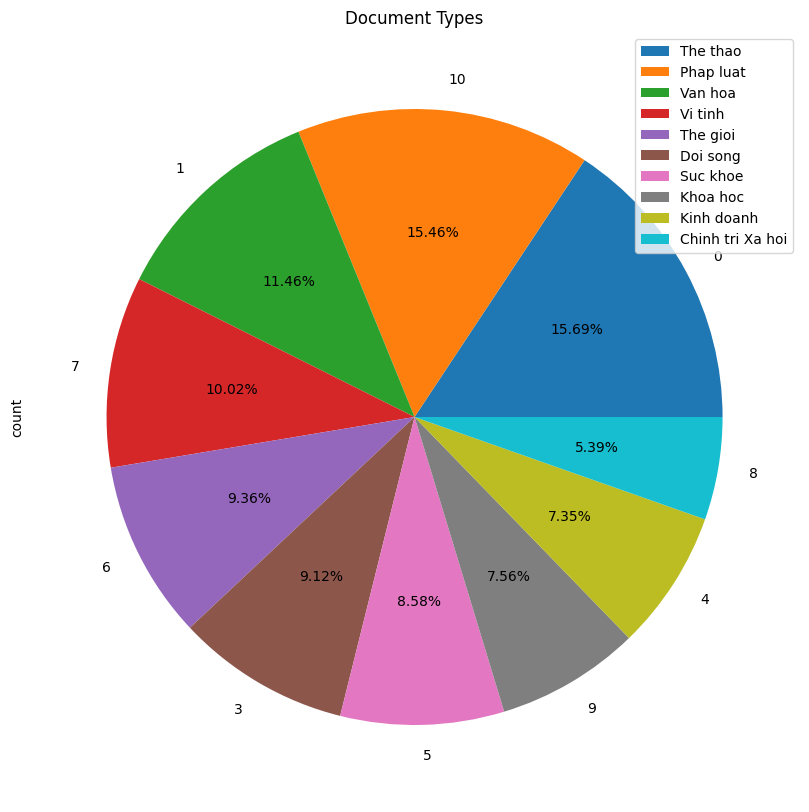

In [17]:
plt.figure(figsize=(10, 10))
df['Label'].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title("Document Types")
plt.legend(class_labels.keys())
plt.show()

In [30]:
palette = sns.color_palette("tab20", n_colors=len(df['Label'].unique()))

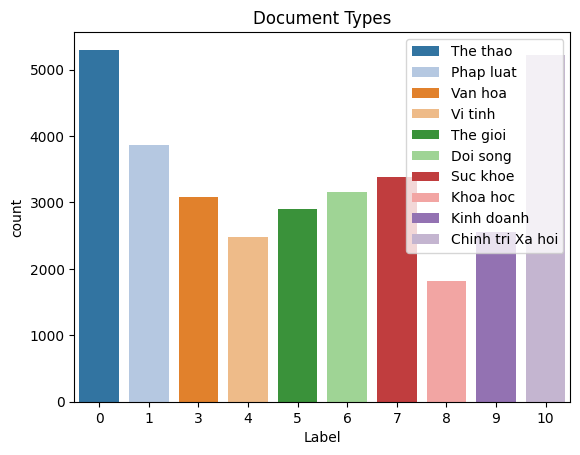

In [27]:
sns.countplot(data=df, x=df['Label'], palette=palette)
plt.title("Document Types")
plt.legend(class_labels.keys())
plt.show()

### Data Preprocessing

In [14]:
# read all vietnamese stopwords from file
def read_stopwords(path):
    with open(path, 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file]
    return stopwords

stopwords_file_path = 'stopwords_vn.txt'
stopwords_list = read_stopwords(stopwords_file_path)

print(stopwords_list)
print(len(stopwords_list))

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [15]:
# All text is kind of clean
import re
def preprocess_data(text):
    text = text.lower()
    text = re.sub("\s+"," ",text)

    # tokens
    tokens = word_tokenize(text)
    
    # remove punctuation and stopword
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)
        
    return " ".join(final_text)

In [16]:
x_train, x_test,y_train,y_test = train_test_split(df['Text'],df['Label'],test_size=0.2, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27007,)
(6752,)
(27007,)
(6752,)


In [34]:
x_train

28618    Mở rộng đô thị Hội An\n HĐND thị xã Hội An vừa...
33339     Xin phép xây dựng tạm: Đủ thứ lý do “ngâm” hồ...
4099      Mancini không cầu hòa Adriano ghi bàn trở lại...
16219     Nhân vật kỳ bí nhất trong năm Bin Laden thườn...
19811    Sài Gòn thương nhớ cà phê \n Nằm trong ngõ hay...
                               ...                        
7339      Báo cáo sai sự thật, một giám đốc bị cách chứ...
21848    Ngày càng có nhiều người mắc bệnh lo âu\n Bà T...
16698    Philippines bác bỏ yêu sách của nhóm bắt cóc I...
5836     Vụ án 'vườn điều': Luật sư cho rằng các bị cáo...
7338     Giả làm cảnh sát cơ động để chiếm đoạt xe máy ...
Name: Text, Length: 27007, dtype: object

In [35]:
y_train

28618    10
33339    10
4099      0
16219     5
19811     6
         ..
7339      1
21848     7
16698     5
5836      1
7338      1
Name: Label, Length: 27007, dtype: int64

In [38]:
clean_train = x_train.apply(preprocess_data)
clean_test = x_test.apply(preprocess_data)
# it takes about 7 minutes to run

In [39]:
clean_train

28618    rộng đô thị hội an hđnd thị xã hội an quyết đị...
33339    phép xây dựng tạm lý “ ngâm ” hồ sơ bùi công h...
4099     mancini cầu hòa adriano ghi bàn trở mừng inter...
16219    nhân vật kỳ bí bin laden xuất hiện đài truyền ...
19811    sài gòn thương cà phê nằm ngõ vỉa hè đường đườ...
                               ...                        
7339     báo cáo sai giám đốc chức nlđ 1-3 trịnh ngọc h...
21848    mắc bệnh lo âu thảo phương 50 long an bệnh việ...
16698    philippine yêu sách bắt cóc iraq tối manila tu...
5836     vụ án 'vườn luật sư cáo vô tội hôm 30/7 lê văn...
7338     giả cảnh sát động chiếm đoạt xe máy công an lo...
Name: Text, Length: 27007, dtype: object

In [40]:
clean_test

10936    đừng chiếu phim hàn quốc chẳng đài truyền hình...
14964    biển tử thần somalia kỳ 1 đụng độ biển vụ đụng...
33405    khai mạc mùa du lịch hạ long 50 giá vé tham qu...
25020    khoa học ngộ hiện tượng tế bào sát quan sát tế...
18545    vòi hoa sen thị trường hàng chục vòi hoa sen m...
                               ...                        
33234    tù victoria hong kong du phát biểu 12-3 cục tr...
15234    đột phá đàm phán nga iran trưởng đoàn đàm phán...
32232    tổ ấm bao bận tâm vấn đề sâu tổ ấm tất lo toan...
28452    thể đổi tiền polymer rách hỏng hướng ban hành ...
16643    palestine arafat `` tất ngủ mary jara quanh tv...
Name: Text, Length: 6752, dtype: object

In [7]:
clean_test = pd.read_csv("dataset/vietnamese_document_test.csv")
clean_train = pd.read_csv("dataset/vietnamese_document_train.csv")

In [10]:
clean_test.

,Text
0,đừng chiếu phim hàn quốc chẳng đài truyền hình...
1,biển tử thần somalia kỳ 1 đụng độ biển vụ đụng...
2,khai mạc mùa du lịch hạ long 50 giá vé tham qu...
3,khoa học ngộ hiện tượng tế bào sát quan sát tế...
4,vòi hoa sen thị trường hàng chục vòi hoa sen m...
...,...
6747,tù victoria hong kong du phát biểu 12-3 cục tr...
6748,đột phá đàm phán nga iran trưởng đoàn đàm phán...
6749,tổ ấm bao bận tâm vấn đề sâu tổ ấm tất lo toan...
6750,thể đổi tiền polymer rách hỏng hướng ban hành ...


In [42]:
# clean_test.to_csv("dataset/vietnamese_document_test.csv",index=False)
# clean_train.to_csv("dataset/vietnamese_document_train.csv",index=False)

### WordCloud

In [18]:
def generate_wordcloud(data,column):
    str_text=data[column].str.cat(sep=" ")
    wordcloud=WordCloud(width=500,height=300,background_color='Gold').generate(str_text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [19]:
generate_wordcloud(df,"Text")

: 

### term frequency – inverse document frequency (TF-IDF)

In [9]:
tfidf = TfidfVectorizer(ngram_range=(1,3),max_df=0.95,max_features=15000)
tfidf_train = tfidf.fit_transform(clean_train)
tfidf_test = tfidf.transform(clean_test)

ValueError: max_df corresponds to < documents than min_df

### A is sparse matrix - Tf-idf-weighted document-term matrix.

In [21]:
tfidf_train.A.shape

(23631, 15000)

In [22]:
tfidf_train.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01627809, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### LogisicRegression Model

In [23]:
lg_model = LogisticRegression()
lg_model.fit(tfidf_train, y_train)

LogisticRegression()

In [24]:
y_pred = lg_model.predict(tfidf_test)
y_pred

array([9, 8, 8, ..., 6, 0, 5], dtype=int64)

In [25]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))
print()
print(f"Accuracy On Test Data: {accuracy_score(y_test,y_pred)*100:.2f}")

Confusion Matrix:
 [[1352   44   12   40   66   32    7    4    9    4]
 [  43  856   10    3    4   16    9   10   20    6]
 [  23   21  453    3    0   29    6    0    4    9]
 [  56    5    0  655   13    0    4    1    1    9]
 [  71    5    1    4 1051    7    3    5    4    4]
 [  16   16    8    3    0  946    3    1    1    0]
 [  18   11    5   10   11   16  818    1    9    7]
 [   5    3    0    1    7    0    4 1593    7    1]
 [  28   22    8    1    3    2   11    1  798    0]
 [  21    2   13    8    3    4    8    0    4  676]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1570
           1       0.87      0.88      0.87       977
           2       0.89      0.83      0.86       548
           3       0.90      0.88      0.89       744
           5       0.91      0.91      0.91      1155
           6       0.90      0.95      0.92       994
           7       0.94      0.90      0.92   

In [26]:
labels = list(class_labels.keys())
labels

['Chinh tri Xa hoi',
 'Doi song',
 'Khoa hoc',
 'Kinh doanh',
 'Phap luat',
 'Suc khoe',
 'The gioi',
 'The thao',
 'Van hoa',
 'Vi tinh']

In [27]:
def predict_result(path):
    text_data = read_extract_text_file(path)
    clean_text_data = preprocess_data(text_data)
    
    tfidf_data = tfidf.transform([clean_text_data])
    y_pred = lg_model.predict(tfidf_data.A)
    result = f"Given Document Is Related To : {labels[y_pred[0]]}"
    return result

In [28]:
# Doan trich tu VNexpress thuoc linh vuc kinh doanh
path_test = "E:\Projects\Ex\ex.txt"
predict_result(path_test)

'Given Document Is Related To : Kinh doanh'